In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
PATH  = '/content/drive/MyDrive/CSCI 527 Project/Winning Percentage Predictor Data/winning Percentage Update/'

In [6]:
import pandas as pd
wins = pd.read_csv(PATH + 'completed.csv',header=None)

In [7]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [8]:
wins.head()

,0,1,2,3,4,5,6,7,8,9,10
0,/gen8monotyperandombattle-1188376334,1,1,0,0,600.000000,1,0,0,600.000000,0
1,/gen8monotyperandombattle-1188376334,2,1,0,0,509.868421,2,1,0,500.000000,0
2,/gen8monotyperandombattle-1188376334,3,1,0,0,509.868421,2,1,0,500.000000,0
3,/gen8monotyperandombattle-1188376334,4,2,1,0,500.000000,2,1,0,493.436293,0
4,/gen8monotyperandombattle-1188376334,5,2,1,0,500.000000,3,2,0,400.000000,0


In [9]:
wins = wins.loc[:, wins.columns !=0]

In [10]:
wins.columns = ['Turn Number', 'Switched A', 'Fainted A', 'Stats A', 'Total Health A', 'Switched B', 'Fainted B', 'Stats B', 'Total Health B', 'label']

In [11]:
wins.head()

,Turn Number,Switched A,Fainted A,Stats A,Total Health A,Switched B,Fainted B,Stats B,Total Health B,label
0,1,1,0,0,600.000000,1,0,0,600.000000,0
1,2,1,0,0,509.868421,2,1,0,500.000000,0
2,3,1,0,0,509.868421,2,1,0,500.000000,0
3,4,2,1,0,500.000000,2,1,0,493.436293,0
4,5,2,1,0,500.000000,3,2,0,400.000000,0


In [24]:
X = wins.loc[:, wins.columns != 'label']
y = wins.loc[:, wins.columns == 'label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Baseline Classifier

In [26]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)


DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [27]:
DummyClassifier(strategy='most_frequent')
dummy_clf.score(X, y)

0.5013686462662424

# Logisitic Regression

In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.625505
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.098       
Dependent Variable: label            AIC:              1188738.1822
Date:               2020-11-29 19:46 BIC:              1188844.0621
No. Observations:   950209           Log-Likelihood:   -5.9436e+05 
Df Model:           8                LL-Null:          -6.5863e+05 
Df Residuals:       950200           LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     5.0000                                         
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Turn Number        0.0017   0.0002   11.0082 0.0000  0.0014  0.0020
Switched A         0.0304   0.0028   10.9

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate

predicted = cross_validate(LogisticRegression(), X,y, cv=10)
#metrics.accuracy_score(y, predicted)

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[93458 49729]
 [56618 85258]]


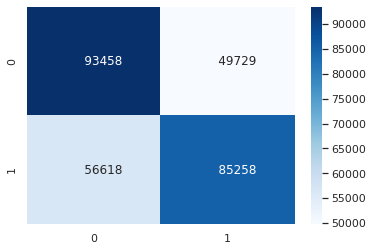

In [35]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='10',  cmap='Blues')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64    143187
           1       0.63      0.60      0.62    141876

    accuracy                           0.63    285063
   macro avg       0.63      0.63      0.63    285063
weighted avg       0.63      0.63      0.63    285063



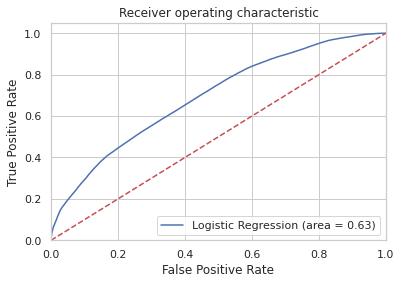

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Navie Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

print('With NB accuracy is: ',nb.score(X_test,y_test)) # accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


With NB accuracy is:  0.602049371542431


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.66    143187
           1       0.65      0.43      0.52    141876

    accuracy                           0.60    285063
   macro avg       0.62      0.60      0.59    285063
weighted avg       0.62      0.60      0.59    285063



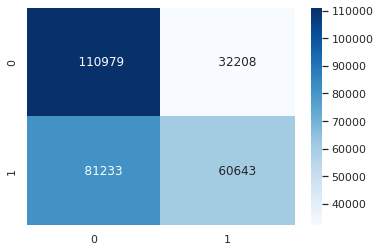

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='10',  cmap='Blues')

# Decision Tree & Random Forest

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

print('With Decision tree accuracy is: ',dtree.score(X_test,y_test)) # accuracy

With Decision tree accuracy is:  0.6616186597348657


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67    143187
           1       0.67      0.64      0.65    141876

    accuracy                           0.66    285063
   macro avg       0.66      0.66      0.66    285063
weighted avg       0.66      0.66      0.66    285063



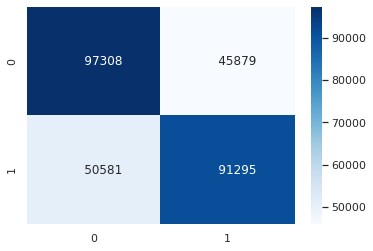

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='10',  cmap='Blues')

In [44]:
from sklearn import tree
tree.export_graphviz(dtree, out_file="tree.dot")

 Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)

print('With Random Forest accuracy is: ',rf.score(X_test,y_test)) # accuracy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


With Random Forest accuracy is:  0.7012976078972016


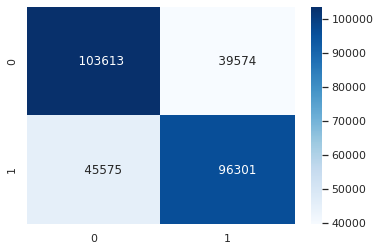

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(confusion_matrix, annot=True, fmt='10',  cmap='Blues')

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71    143187
           1       0.71      0.68      0.69    141876

    accuracy                           0.70    285063
   macro avg       0.70      0.70      0.70    285063
weighted avg       0.70      0.70      0.70    285063



# XGB Classifier

In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65    143187
           1       0.65      0.57      0.61    141876

    accuracy                           0.63    285063
   macro avg       0.63      0.63      0.63    285063
weighted avg       0.63      0.63      0.63    285063



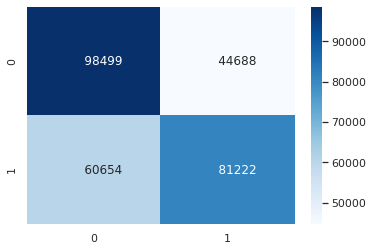

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='10',  cmap='Blues')

# Neural Network

In [52]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1)
predictions = model.predict_classes(X_test)

Epoch 1/50
5197/5197 [==============================] - 6s 1ms/step - loss: 0.6769 - accuracy: 0.6003
Epoch 2/50
5197/5197 [==============================] - 6s 1ms/step - loss: 0.6351 - accuracy: 0.6168
Epoch 3/50
5197/5197 [==============================] - 6s 1ms/step - loss: 0.6283 - accuracy: 0.6206
Epoch 4/50
5197/5197 [==============================] - 6s 1ms/step - loss: 0.6246 - accuracy: 0.6217
Epoch 5/50
5197/5197 [==============================] - 6s 1ms/step - loss: 0.6222 - accuracy: 0.6233
Epoch 6/50
5197/5197 [==============================] - 6s 1ms/step - loss: 0.6210 - accuracy: 0.6237
Epoch 7/50
5197/5197 [==============================] - 6s 1ms/step - loss: 0.6200 - accuracy: 0.6243
Epoch 8/50
5197/5197 [==============================] - 6s 1ms/step - loss: 0.6194 - accuracy: 0.6248
Epoch 9/50
5197/5197 [==============================] - 6s 1ms/step - loss: 0.6191 - accuracy: 0.6251
Epoch 10/50
5197/5197 [==============================] - 7s 1ms/step - loss: 0.618

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.77      0.67    143187
           1       0.68      0.49      0.57    141876

    accuracy                           0.63    285063
   macro avg       0.64      0.63      0.62    285063
weighted avg       0.64      0.63      0.62    285063



# Results


## ROC Curve

In [54]:
# Instantiate the classfiers and make a list
classifiers = [dummy_clf, logreg, nb, dtree, rf, xgb]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    #model = cls.fit(X_train, y_train)
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

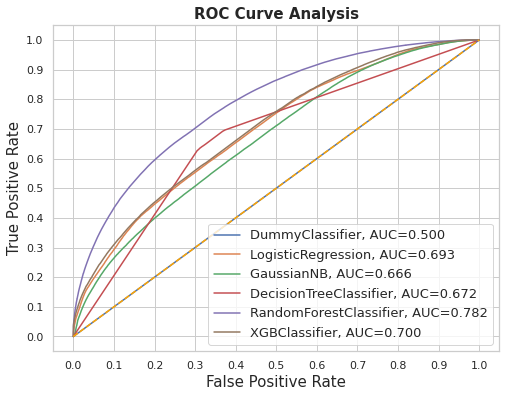

In [57]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [58]:
fig.savefig('multiple_roc_curve.png')